หาค่าความสัมพันะ์ระหว่าง ผลิตภัณฑ์มวลรวมในประเทศ (GDP) กับ ราคา Big Mac ในหน่วยดอลลาร์สหรัฐ
สมการเส้นตรง y = mx + c
โดยที่
y คือ ราคา Big Mac
x คือ GDP

1.Import Libary และดู Version

In [1]:
import pandas as pd #สำหรับจัดการข้อมูลแบบตาราง
import numpy as np #สำหรับคำนวณทางคณิตศาสตร์ เช่น Array
import seaborn as sns #สำหรับสร้างกราฟและแสดงผลข้อมูล
import matplotlib.pyplot as plt #สำหรับสร้างกราฟและแสดงผลข้อมูล
import matplotlib

print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')

pandas version: 2.2.2
numpy version: 2.0.2
seaborn version: 0.13.2
matplotlib version: 3.10.0


2.การโหลดข้อมูล

In [2]:
ulr = 'https://github.com/TheEconomist/big-mac-data/releases/download/2025-01/big-mac-adjusted-index.csv'
df = pd.read_csv(ulr, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,8317.724800,1.941077,0.36397,NaN,-0.07809,0.09763,0.96247
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,28023.744000,2.287635,-0.28631,NaN,-0.51761,-0.42567,0.02686
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4511.789017,1.874144,-0.06873,NaN,-0.37055,-0.25058,0.33990
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20131.339789,2.148836,0.47950,NaN,0.00000,0.19060,1.12869
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,24539.928589,2.226367,-0.07777,NaN,-0.37666,-0.25785,0.32689


3.การสำรวจข้อมูล

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1645 non-null   datetime64[ns]
 1   iso_a3         1645 non-null   object        
 2   currency_code  1645 non-null   object        
 3   name           1645 non-null   object        
 4   local_price    1645 non-null   float64       
 5   dollar_ex      1645 non-null   float64       
 6   dollar_price   1645 non-null   float64       
 7   GDP_bigmac     1645 non-null   float64       
 8   adj_price      1645 non-null   float64       
 9   USD            1645 non-null   float64       
 10  EUR            1618 non-null   float64       
 11  GBP            1645 non-null   float64       
 12  JPY            1645 non-null   float64       
 13  CNY            1645 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 180.1+ KB


In [4]:
df = df[(df['date'].dt.year==2019)&(df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,15199.573616,3.252023,-0.40195,-0.47625,-0.36932,-0.25492,-0.35473
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,56235.238033,4.455652,-0.05132,-0.16917,0.00045,0.18192,0.02359
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,8943.752112,3.068532,0.43877,0.26004,0.51728,0.79250,0.55238
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,46559.082339,4.171838,-0.05175,-0.16954,0.00000,0.18139,0.02313
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,40808.494010,4.003166,0.23372,0.08046,0.30104,0.53704,0.33113


### **4.สร้างกราฟเพื่อดูความสัมพันธ์**

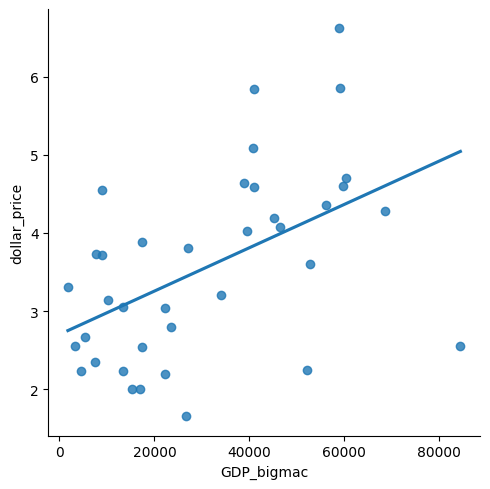

In [8]:
sns.lmplot(x='GDP_bigmac', y = 'dollar_price',data = df, ci=None)

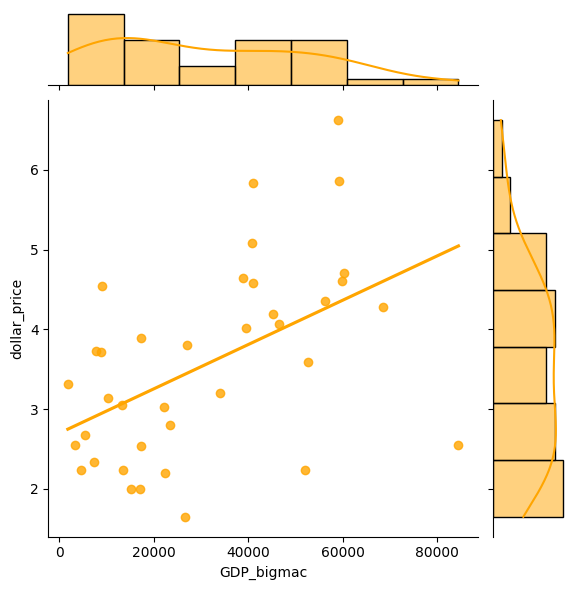

In [34]:
sns.jointplot(x='GDP_bigmac', y = 'dollar_price',data = df, kind='reg',ci=None,color='orange')

### **5.เตรียมและสร้างโมเดลด้วย Scikit-learn**

In [14]:
import sklearn
from sklearn.linear_model import LinearRegression
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.6.1


In [15]:
model = LinearRegression()
model.get_params() #แสดงพารามิเตอร์ตั้งต้นของโมเดล ซึ่งกำหนดเป็น default

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### **6.การฝึกสอน(fitting), ประเมิน(Scoring) และทำนายโมเดล(Predicting)**

In [25]:
df[['GDP_bigmac']] #สังเกตการใช้ [[]] เพื่อให้ได้ dataframe (2D)
model.fit(df[['GDP_bigmac']], df['dollar_price'])

LinearRegression()

In [26]:
model.score(df[['GDP_bigmac']], df['dollar_price']) #จะคืนค่าเป็น R-Squared ซึ่งบอกความผันผวนของราคา Bigmac เป็นร้อยละ

0.2517017715063411

In [33]:
model.predict([[8000],[10000],[12000]]) #ใช้สำหรับทำนายค่า y จากค่า x ใหม่

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.9220877 , 2.97761016, 3.03313261])

### **7.ดูค่า Intercept(จุดตัดแกน y) และ Coefficient(ความชัน)**

In [38]:
model.intercept_

np.float64(2.6999978825873896)

In [37]:
model.coef_

array([2.77612277e-05])

 **สมการเส้นตรง dollar_price = (2.776e-05*GDP_bigmac)+2.70**

### **8.แบ่ง dataset เป็น train และ test**

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['GDP_bigmac']], df['dollar_price'], test_size=30)

In [76]:
model.fit(x_train, y_train) #การฝึกสอนด้วย Training set
model.score(x_train, y_train) #ประเมินด้วย Training set

0.3874313628317322

### **9.การใช้ statmodels**

In [77]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [78]:
model_a=smf.ols(formula='dollar_price ~ GDP_bigmac',data=df).fit() #การสร้างโมเดล Ordinary Least
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     11.77
Date:                Thu, 17 Jul 2025   Prob (F-statistic):            0.00156
Time:                        07:11:17   Log-Likelihood:                -53.601
No. Observations:                  37   AIC:                             111.2
Df Residuals:                      35   BIC:                             114.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7000      0.306      8.813      0.000       2.078       3.322
GDP_bigmac  2.776e-05   8.09e-06      3.431      0.002    1.13e-05    4.42e-05
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.023
Skew:                          -0.052   Prob(JB):                        0.988
Kurtosis:                       3.065   Cond. No.                     6.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**ตัวแปรตาม ~ ตัวแปรต้น รูปแบบนี้เรียกว่า Pasty fomula P-Value ถ้านน้อยกว่า 0.05 ถือว่าตัวแปรนั้นมีนัยสำคัญทางสถิติ จากข้อมูล P-Value = 0.02 < 0.05 แสดงว่า GDP_bigmac มีผลต่อราคา Bigmac อย่างมีนัยสำคัญ**